In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [147]:
plt.rcParams["figure.figsize"] = (20,10)

In [148]:
def getDataFromRankCSV():
    path = os.getcwd()
    datapath = os.path.join(path, "../../inputs/New folder/Ausgabe_Zweige_rank_1.csv")
    csvList = []
    df = pd.read_csv(datapath, sep=';', comment='#', header=0, skiprows=[0,1,3,4,5], error_bad_lines=False, encoding='unicode_escape')
    csvList.append(df)
    columns = df.columns
    datapath = os.path.join(path, "../../inputs/New folder")
    fileList = [os.path.join(root, file) for root, dirs, files in os.walk(datapath) for file in files
               if not file.endswith('rank_1.csv')]
    for file in fileList:
        df = pd.read_csv(file, sep=';', comment='#', header=None, error_bad_lines=False, encoding='unicode_escape')
        df.columns = columns
        csvList.append(df)
    data = pd.concat(csvList, axis=0, ignore_index=False)
    data = data.loc[:, ['bezeichner', 'nnf', 'ausl_n0_vor', 'i_n0_vor']]
    data.columns = ['Name', 'Time_step', 'Loading_percent', 'Loading_A']
    return data

In [149]:
path = os.getcwd()
datapath = os.path.join(path, "../../inputs/Ausgabe_Zweige_1.csv")
data1 = pd.read_csv(datapath, sep=';', comment='#', header=0, skiprows=[0,1,3,4,5], error_bad_lines=False, encoding='unicode_escape', 
                   usecols=['bezeichner', 'ausl_n0_vor', 'nnf', 'i_n0_vor'])
data1.columns = ['Name', 'Time_step', 'Loading_percent', 'Loading_A']
datapath = os.path.join(path, "../../inputs/Ausgabe_Zweige_2.csv")
data2 = pd.read_csv(datapath, sep=';', comment='#', header=0, skiprows=[0,1,3,4,5], error_bad_lines=False, encoding='unicode_escape', 
                   usecols=['bezeichner', 'ausl_n0_vor', 'nnf', 'i_n0_vor'])
data2.columns = ['Name', 'Time_step', 'Loading_percent', 'Loading_A']
data3 = getDataFromRankCSV()
data = pd.concat([data1, data2, data3], axis=0, sort=False)
data.sort_values(by='Time_step', inplace=True)

In [150]:
overloaded = data.loc[data['Loading_percent']>100, ['Name', 'Time_step', 'Loading_percent']]
overloaded.sort_values(by='Time_step', inplace=True)

In [151]:
avg_load_per_timestep = pd.DataFrame(data={'Time_step': np.arange(1, 8761),
                                          'avg_loading': np.full(8760, 0, dtype=float),
                                          'number_overloading': np.full(8760, 0, dtype=int),
                                          'avg_overloading': np.full(8760, 0, dtype=float)})

In [152]:
for i in range(1,8761):
    avg_load_per_timestep.loc[avg_load_per_timestep['Time_step']==i, 'avg_loading'] = \
    data.loc[data['Time_step']==i, 'Loading_percent'].mean(axis=0)
    avg_load_per_timestep.loc[avg_load_per_timestep['Time_step']==i, 'number_overloading'] = \
    overloaded.loc[overloaded['Time_step']==i].shape[0]
    avg_load_per_timestep.loc[avg_load_per_timestep['Time_step']==i, 'avg_overloading'] = \
    overloaded.loc[overloaded['Time_step']==i, 'Loading_percent'].mean(axis=0)
avg_load_per_timestep.fillna(0, inplace=True)

In [153]:
data

,Name,Time_step,Loading_percent,Loading_A
0,Trafo_HSMS,1,59.821455,2763.034634
142,L_39R_2,1,7.960546,25.394141
143,Trafo_19,1,30.557466,2.822778
144,L_19R_2,1,7.054566,22.504066
145,L_2R_2,1,7.050112,22.489859
...,...,...,...,...
158919,Trafo_19,8761,326.326288,30.144731
158918,L_39R_2,8761,51.535158,164.397153
158917,Trafo_39,8761,224.753577,12.976154
158928,L_4R_3,8761,28.861115,92.066958


In [154]:
avg_load_per_timestep

,Time_step,avg_loading,number_overloading,avg_overloading
0,1,33.996565,0,0.000000
1,2,33.884877,6,101.836588
2,3,38.560540,23,111.662417
3,4,38.107079,23,110.123508
4,5,38.176361,23,110.847242
...,...,...,...,...
8755,8756,7.753079,0,0.000000
8756,8757,7.874391,0,0.000000
8757,8758,7.465503,0,0.000000
8758,8759,7.048186,0,0.000000


In [155]:
overloaded

,Name,Time_step,Loading_percent
23166,L_0R_36,2,102.536600
23018,Knoten_79_Stich_boost,2,101.136575
23019,Knoten_79_Stich_boost_1,2,101.136575
23191,L_0R_36_boost_1,2,102.536600
22991,Knoten_79_Stich,2,101.136575
...,...,...,...
158833,L_33R_39,8761,119.379532
158834,Trafo_33,8761,239.012217
158835,L_0R_39,8761,115.092835
158824,L_Knoten_94_Stichabgang_R_Knoten_79_boost_boost,8761,111.391307


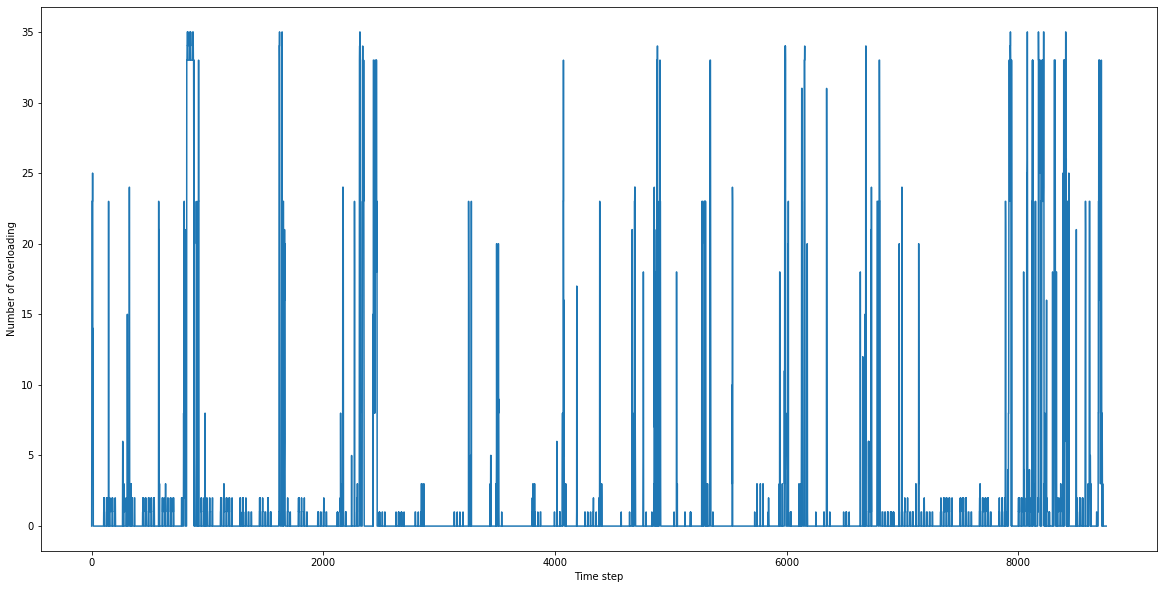

In [156]:
plt.plot(avg_load_per_timestep['Time_step'], avg_load_per_timestep['number_overloading'])
plt.ylabel('Number of overloading')
plt.xlabel('Time step')
datapath = os.path.join(path, "../../results/Loading plots/Number of overloading.png")
plt.savefig(datapath)
plt.show()

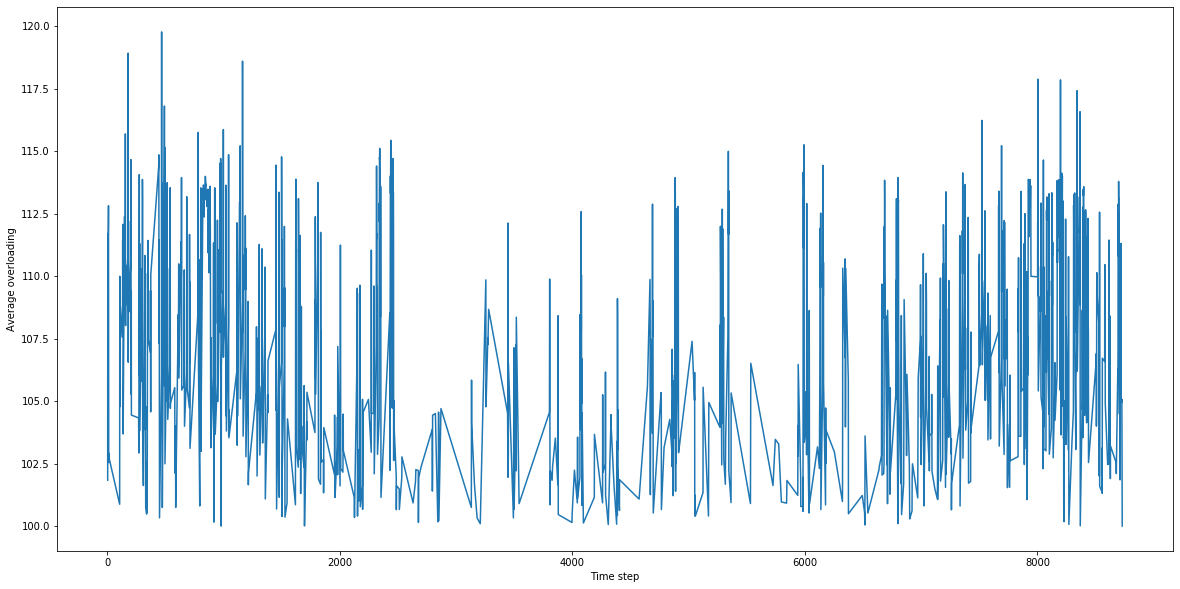

In [157]:
x = avg_load_per_timestep.loc[avg_load_per_timestep['avg_overloading']>0, 'Time_step']
y = avg_load_per_timestep.loc[avg_load_per_timestep['avg_overloading']>0, 'avg_overloading']
plt.plot(x, y)
plt.ylabel('Average overloading')
plt.xlabel('Time step')
datapath = os.path.join(path, "../../results/Loading plots/Average overloading.png")
plt.savefig(datapath)
plt.show()

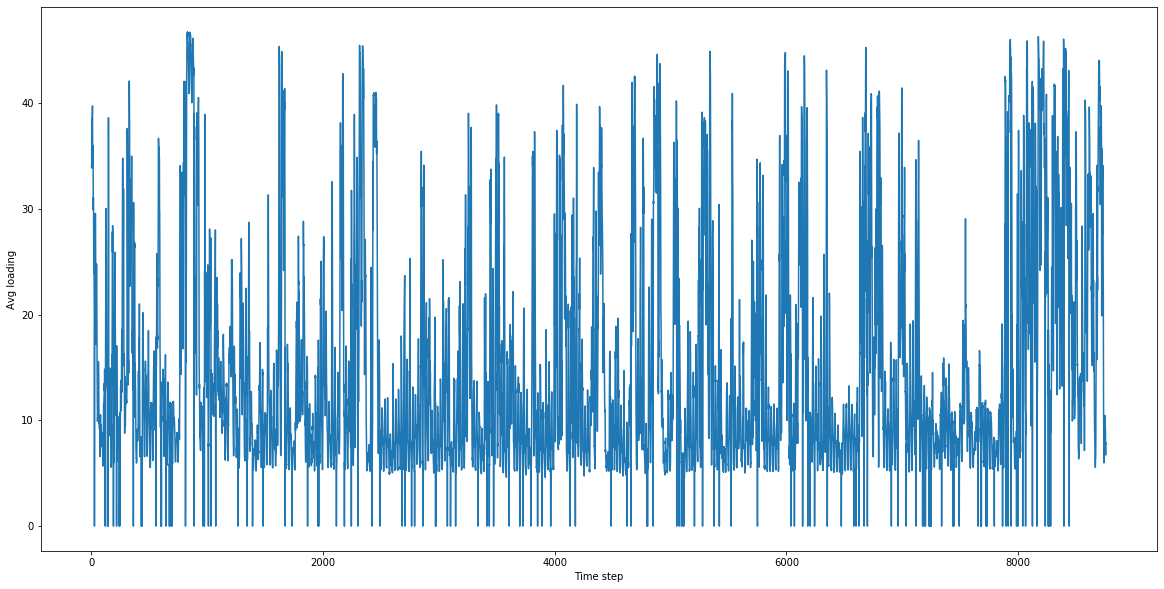

In [158]:
plt.plot(avg_load_per_timestep['Time_step'], avg_load_per_timestep['avg_loading'])
plt.ylabel('Avg loading')
plt.xlabel('Time step')
datapath = os.path.join(path, "../../results/Loading plots/Avg loading.png")
plt.savefig(datapath)
plt.show()

In [159]:
overloaded.to_pickle("../../results/overloaded.pkl")
avg_load_per_timestep.to_pickle("../../results/avg_load_per_timestep.pkl")